# Importing some modules

In [1]:
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import *
from tensorflow.keras import Sequential
from tensorflow.keras import optimizers
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

tf.keras.backend.set_floatx('float64')
tf.random.set_seed(1)
np.random.seed(1)

# Retrieving data

In [2]:
from example import X, y

print('data shape:', X.shape, y.shape)

data shape: (1000, 1) (1000,)


## Reshape data for CNN cell

In [3]:
X = X.reshape(-1, 1, 1)  # why this shape?

In [4]:
# splitting the dataset into train and test parts

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=0)
X_train.shape, y_test.shape

((670, 1, 1), (330,))

# Build the model

In [5]:
model = Sequential()

model.add(Conv1D(10, 1, activation='relu'))
model.add(Conv1D(10, 1, activation='relu'))

# final layer: a neuron with linear activation acts like a summation operator.
model.add(Dense(1))

opt = optimizers.Adam()
loss = tf.keras.losses.MeanSquaredError(name='loss')

model.compile(optimizer=opt, loss=loss, metrics=['mae'])

In [6]:
# training options

# https://keras.io/api/callbacks/early_stopping/
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=20,
                               restore_best_weights=True)

# fit options
params = dict(epochs=100,
              batch_size=1,
              verbose=2,
              validation_split=0.2,
              callbacks=[early_stopping])

In [7]:
# train the model

history = model.fit(X_train, y_train, **params)

Epoch 1/100
536/536 - 1s - loss: 8.5008 - mae: 2.0345 - val_loss: 3.9601 - val_mae: 1.6396
Epoch 2/100
536/536 - 1s - loss: 4.7417 - mae: 1.7601 - val_loss: 3.4379 - val_mae: 1.5583
Epoch 3/100
536/536 - 0s - loss: 4.0930 - mae: 1.6408 - val_loss: 2.9993 - val_mae: 1.4669
Epoch 4/100
536/536 - 1s - loss: 3.4958 - mae: 1.5231 - val_loss: 2.4961 - val_mae: 1.3411
Epoch 5/100
536/536 - 0s - loss: 2.9608 - mae: 1.3998 - val_loss: 2.2224 - val_mae: 1.2742
Epoch 6/100
536/536 - 0s - loss: 2.5001 - mae: 1.3055 - val_loss: 1.7520 - val_mae: 1.1267
Epoch 7/100
536/536 - 0s - loss: 2.0470 - mae: 1.1626 - val_loss: 1.4303 - val_mae: 0.9861
Epoch 8/100
536/536 - 0s - loss: 1.6837 - mae: 1.0547 - val_loss: 1.1213 - val_mae: 0.8825
Epoch 9/100
536/536 - 0s - loss: 1.3395 - mae: 0.9160 - val_loss: 1.0185 - val_mae: 0.8536
Epoch 10/100
536/536 - 0s - loss: 1.0779 - mae: 0.8148 - val_loss: 0.7613 - val_mae: 0.7215
Epoch 11/100
536/536 - 0s - loss: 0.8541 - mae: 0.7149 - val_loss: 0.6239 - val_mae: 0.64

Epoch 91/100
536/536 - 1s - loss: 0.0404 - mae: 0.1126 - val_loss: 0.0274 - val_mae: 0.1061
Epoch 92/100
536/536 - 0s - loss: 0.0388 - mae: 0.1180 - val_loss: 0.0249 - val_mae: 0.1105
Epoch 93/100
536/536 - 0s - loss: 0.0378 - mae: 0.1188 - val_loss: 0.0248 - val_mae: 0.0983
Epoch 94/100
536/536 - 0s - loss: 0.0375 - mae: 0.1123 - val_loss: 0.0247 - val_mae: 0.1029
Epoch 95/100
536/536 - 0s - loss: 0.0374 - mae: 0.1171 - val_loss: 0.0208 - val_mae: 0.0937
Epoch 96/100
536/536 - 0s - loss: 0.0366 - mae: 0.1114 - val_loss: 0.0226 - val_mae: 0.0884
Epoch 97/100
536/536 - 0s - loss: 0.0394 - mae: 0.1163 - val_loss: 0.0201 - val_mae: 0.0904
Epoch 98/100
536/536 - 1s - loss: 0.0367 - mae: 0.1163 - val_loss: 0.0205 - val_mae: 0.0863
Epoch 99/100
536/536 - 0s - loss: 0.0365 - mae: 0.1121 - val_loss: 0.0229 - val_mae: 0.0835
Epoch 100/100
536/536 - 1s - loss: 0.0349 - mae: 0.1093 - val_loss: 0.0294 - val_mae: 0.0907


# Model accuracy with MAE

In [8]:
p = model.predict(X_test).flatten()
mae_test = tf.keras.losses.mean_absolute_error(y_test, p).numpy()

p = model.predict(X_train).flatten()
mae_train = tf.keras.losses.mean_absolute_error(y_train, p).numpy()

print('MAE for training set: %.2e' % mae_train)
print('MAE for test     set: %.2e' % mae_test)

MAE for training set: 9.90e-02
MAE for test     set: 1.21e-01


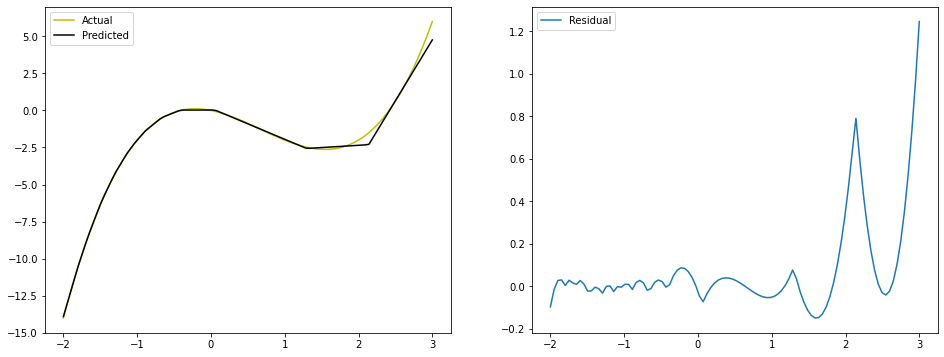

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

from example import a, b, f

xx = np.linspace(a, b, 100)
yy = f(xx)
pp = model.predict(xx.reshape(-1, 1, 1)).flatten()

ax1.plot(xx, yy, 'y-', label='Actual')
ax1.plot(xx, pp, 'k-', label='Predicted')
# ax1.plot(X_train, y_train, 'rx', label='Train data', markersize=1)
# ax1.plot(X_test, y_test, 'bo', label='Test data', markersize=1)

ax2.plot(xx, yy - pp, label='Residual')

ax1.legend()
ax2.legend()

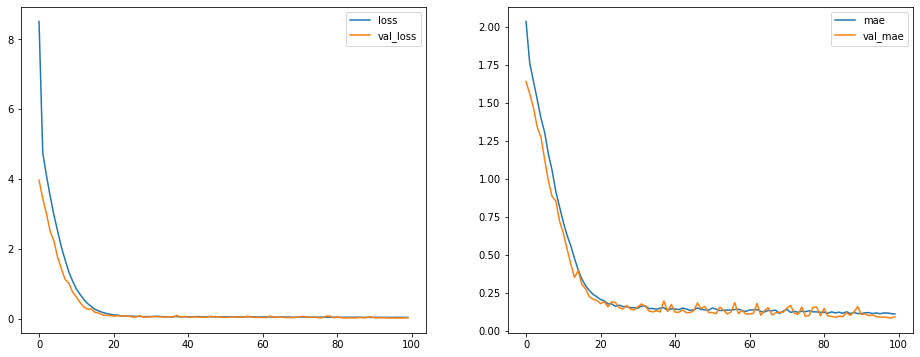

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

loss = history.history['loss']
val_loss = history.history['val_loss']

mae = history.history['mae']
val_mae = history.history['val_mae']

ax1.plot((loss), label='loss')
ax1.plot((val_loss), label='val_loss')
ax1.legend()

ax2.plot((mae), label='mae')
ax2.plot((val_mae), label='val_mae')
ax2.legend()

# Test the model on a long interval

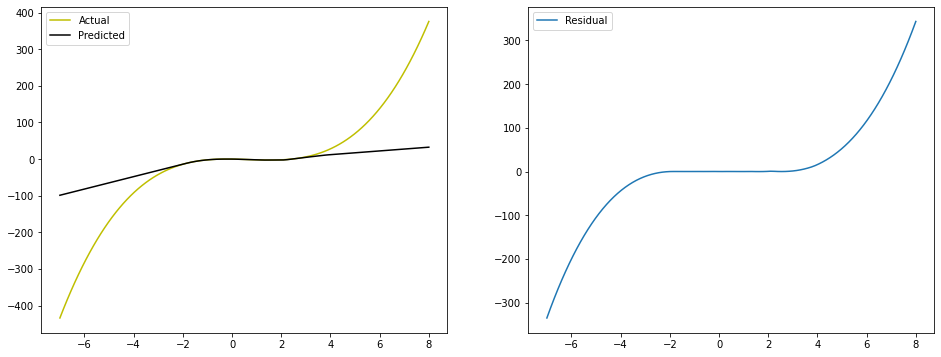

In [11]:
# Extrapolation test

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

xx = np.linspace(a - (b - a), b + (b - a), 100)
yy = f(xx)
pp = model.predict(xx.reshape(-1, 1, 1)).flatten()

ax1.plot(xx, yy, 'y-', label='Actual')
ax1.plot(xx, pp, 'k-', label='Predicted')

ax2.plot(xx, yy - pp, label='Residual')

ax1.legend()
ax2.legend()